# DSS demonstration

In [20]:
import pandas
pandas.set_option('display.max_colwidth', None)
pandas.set_option('display.max_row', 10)
import numpy as np
from weatherdata.ipm import WeatherDataHub
from openalea.dss import Hub

# Acces to IPM DSS from OpenAlea python

## 1. Access to dss catalog 

In [22]:
h = Hub()
h.display()

,dss,models,pests,crops,description
0,no.nibio.vips,PSILARTEMP,[PSILRO],[DAUCS],"The warning system model «Carrot rust fly temperature» is based on a Finnish temperature-based model (Markkula et al, 1998; Tiilikkala & Ojanen, 1999; Markkula et al, 2000). The model determines the start of the flight period for the 1st and 2nd generation of carrot rust fly based on accumuleted degree-days (day-degrees) over a base temperature of 5,0 °C. VIPS uses the model for the 1st generation only. \nStandard air temperature (temperature measured 2 m above ground) is used in the model. Degree-days are defined for this model as the sum of the difference between a base temperature of 5,0 °C and the mean temperature for all days with a temperature >5,0 °C, in other words (daily mean temperature – 5,0 °C) from 1 March (beginning when the ground has thawed).\n"
1,no.nibio.vips,DELIARADIC,[HYLERA],[1BRSG],"The model determines the flight period. It gives information about the expected time of the first \noviposition and continued oviposition of the cabbage maggot in cruciferous crops. The model only \napplies for cabbage maggot, not turnip fly.\n\nBe aware that in areas with field covers (plastic, single or double non-woven covers, etc.) with \nearly crops the preceding season (either on the current field or neighboring fields), the flight \nperiod can start earlier due to higher soil temperature under the covers.\n\nThis model should be used in combination with direct observations of eggs in the field. This is \ndue to large variability and to get an idea of the severity of attack.\n"
2,no.nibio.vips,MAMESTRABR,[BARABR],[1BRSG],"The model for the warning system for cabbage moth was developed by Dr. Nina Svae Johansen. \nIt is based on the minimum temperature threshold and the requirement for accumulated \nday-degrees for the different stages of the cabbage moth [CITATION Joh96 \t \l 1044 ]. \nThe accumulated degree-day model calculates forecasts for development of the cabbage moth \nthrough the summer, generates warnings for the time when eggs and small larvae can be \nregistered in the field and the best time for treatment [CITATION Joh97 \t \l 1044 ].\n\nNote that the model is based on temperature, it is not related to the presence or \nabsence of cabbage moth in the field. Thus, it is important to evaluate the situation in the field.\n"
3,no.nibio.vips,PSILAROBSE,[PSILRO],[DAUCS],"The warning system model is based on weekly observations of adult carrot rust flies captured on yellow sticky traps. The model is based in its entirety on observations, with no input of weather data or weather forecasts. Traps are placed in the field edge and in the field and are examined for carrot rust flies weekly throughout the season. The number of adult carrot rust flies is registered in VIPS and is used in the warning system model. The observations are compared with the economic threshold levels and a warning is calculated. After organophosphates (which had a good effect against larvae) were removed from the market, they were replaced by pyrethroids that only work against the adult stage. Studies were carried out in 2005 and 2006 to adjust the larval-based thresholds to chemical control of adult flies. The experience from Norway and other countries indicated that the first treatment against carrot rust flies should be done as soon as possible after the first fly is observed on the traps. The threshold that is used in VIPS is therefore at the first observation of 1 fly.\n"
4,no.nibio.vips,DELIARFOBS,"[HYLERA, HYLEFL]","[BRSOL, BRSOB, BRSOK]","The warning system model is based on weekly observations of oviposition by the \nbrassica root flies [CITATION Bli991 \l 1044 ]. The model is based in its entirety \non observations, with no input of weather data or weather forecasts. The model does \nnot distinguish between the cabbage maggot and the turnip fly. The observations consist \nof collecting sand from the base of 10 plants and floating the eggs in water. The \nc

## 2. Select dss, meta-informations 

In [3]:
pandas.set_option('display.max_colwidth', 50) # parameter view of dataframe

### 2.1 select dss and model

In [4]:
psitemp=h.get(dss="no.nibio.vips", model="PSILARTEMP")

### 2.2 display meta-information of dss model

In [5]:
psitemp.informations("dataframe")

,name,id,description,type_of_decision,pests,crops,weather input,field_observation input,output,output_description
0,Carrot rust fly temperature model,PSILARTEMP,The warning system model «Carrot rust fly temp...,Short-term tactical,[PSILRO],[DAUCS],1002,None,"TMDD5C, THRESHOLD_1, THRESHOLD_2, THRESHOLD_3","Accumulated day degrees, Threshold for start o..."


### 2.3 import IPM weatherdata or local OpenAlea ressouce from local IPM catalog

In [36]:
ws=WeatherDataHub()
slu=ws.get_ressource(name="SLU Lantmet service")
weather=slu.data(parameters=[1002],latitude=[67.28],longitude=[14.37],
                 timeStart='2021-06-01',timeEnd="2021-08-20",timeZone="Europe/Paris",
                 display="json")

In [37]:
weather

[{'timeStart': '2021-05-30T22:00:00Z',
  'timeEnd': '2021-08-19T22:00:00Z',
  'interval': 3600,
  'weatherParameters': [1002],
  'locationWeatherData': [{'longitude': 14.37,
    'latitude': 67.28,
    'altitude': 0.0,
    'amalgamation': [0],
    'data': [[3.58],
     [3.62],
     [3.45],
     [2.98],
     [2.88],
     [3.47],
     [3.95],
     [4.27],
     [4.55],
     [4.99],
     [5.46],
     [6.52],
     [7.82],
     [7.71],
     [7.15],
     [8.14],
     [9.23],
     [9.7],
     [9.83],
     [10.46],
     [9.64],
     [8.04],
     [7.21],
     [5.0],
     [3.82],
     [2.62],
     [2.23],
     [1.02],
     [1.41],
     [3.43],
     [5.38],
     [6.75],
     [9.41],
     [11.15],
     [12.43],
     [13.54],
     [14.71],
     [14.94],
     [16.61],
     [17.67],
     [17.86],
     [18.51],
     [18.28],
     [17.99],
     [16.74],
     [14.93],
     [11.89],
     [9.24],
     [7.65],
     [6.9],
     [6.28],
     [5.78],
     [5.64],
     [6.75],
     [9.36],
     [11.74],
     [13

### 2.4 Run model and vizualise

* run model

In [38]:
ds=psitemp.run(weatherdata=weather)
ds

<xarray.Dataset>
Dimensions:      (time: 81)
Coordinates:
  * time         (time) datetime64[ns] 2021-05-31 2021-06-01 ... 2021-08-19
Data variables:
    TMDD5C       (time) float64 1.2 7.48 16.93 26.42 ... 509.0 515.4 519.8 524.8
    THRESHOLD_1  (time) float64 260.0 260.0 260.0 260.0 ... 260.0 260.0 260.0
    THRESHOLD_2  (time) float64 360.0 360.0 360.0 360.0 ... 360.0 360.0 360.0
    THRESHOLD_3  (time) float64 560.0 560.0 560.0 560.0 ... 560.0 560.0 560.0
Attributes:
    name:             Carrot rust fly temperature model
    id:               PSILARTEMP
    version:          1.0
    authors:          {'name': 'Berit Nordskog', 'email': 'berit.nordskog@nib...
    description:      The warning system model «Carrot rust fly temperature» ...
    description_url:  https://www.vips-landbruk.no/forecasts/models/PSILARTEMP/

* plot output

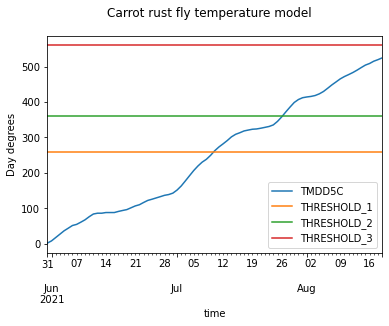

In [9]:
psitemp.plot(ds)

## Example with field observation 

In [26]:
psiobs=h.get(dss="no.nibio.vips", model="PSILAROBSE")


* import fieldObservation 

In [17]:
fieldobs=psiobs.df_reader_fieldObservation(path='C:/Users/mlabadie/Documents/GitHub/dss/example/psilarobs.csv',
                                  longitude=11.025635, 
                                  latitude=59.715791, 
                                  timeZone="Europe/Paris", 
                                  sep=";", dayfirst=True, 
                                  pestEPPOCode="SEPTAP", 
                                  cropEPPOCode="APUGD", 
                                  convert_name=None)
fieldobs

,trapCountCropEdge,trapCountCropInside
2020-06-01 00:00:00+02:00,NaN,NaN
2020-06-02 00:00:00+02:00,NaN,NaN
2020-06-03 00:00:00+02:00,NaN,NaN
2020-06-04 00:00:00+02:00,NaN,NaN
2020-06-05 00:00:00+02:00,NaN,NaN
...,...,...
2020-06-09 00:00:00+02:00,NaN,NaN
2020-06-10 00:00:00+02:00,NaN,NaN
2020-06-11 00:00:00+02:00,NaN,NaN
2020-06-12 00:00:00+02:00,22.0,2.0


In [30]:
ds=psiobs.run(fieldObservation=fieldobs,view="ds")
ds

<xarray.Dataset>
Dimensions:                 (time: 13)
Coordinates:
  * time                    (time) datetime64[ns] 2020-05-31 ... 2020-06-12
Data variables:
    TRAP_COUNT_THRESHOLD    (time) float64 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
    TRAP_COUNT_CROP_EDGE    (time) float64 nan nan nan nan ... nan nan 22.0 nan
    TRAP_COUNT_CROP_INSIDE  (time) float64 nan nan nan nan ... nan nan 2.0 nan
Attributes:
    name:             Carrot rust fly observation model
    id:               PSILAROBSE
    version:          1.0
    authors:          {'name': 'Tor J. Johansen', 'email': 'tor.johansen@nibi...
    description:      The warning system model is based on weekly observation...
    description_url:  https://www.vips-landbruk.no/forecasts/models/PSILAROBSE/

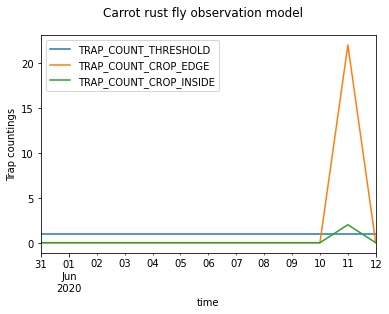

In [29]:
psiobs.plot(ds)